# Load libraries

In [1]:
%load_ext rpy2.ipython

In [21]:
%%R 
library(tidyverse)
library(cowplot)
library(ggforce)

# Load data

In [3]:
%%R -o best_hits
best_hits <- read_csv("data/Ecoli_pangenome_best_hits.csv")


Rows: 7262 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): qseqid, sseqid, component, cinful_id, pephash, sample, contig, seq
dbl (13): pident, length, mismatch, gapopen, qstart, qend, sstart, send, eva...
lgl  (4): hmmerHit, verified, allStandardAA, signalMatch

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [25]:
%%R -o best_MFP_hits
best_MFP_hits <- read_csv("data/Ecoli_pangenome_best_MFP_candidates.csv")

Rows: 136 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): cinful_id, pephash, sample, contig, seq, cvab_hit
dbl (3): start, stop, strand
lgl (1): allStandardAA

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [28]:
best_MFP_hits

,cinful_id,pephash,sample,contig,start,stop,strand,allStandardAA,seq,cvab_hit
1,data/GCA_902845405.1/GCA_902845405.1_E8797_gen...,v1_PLS_300edd153cfc4a9e6a389b7e26bf0d134df0716...,data/GCA_902845405.1/GCA_902845405.1_E8797_gen...,CADGZA010000116.1,14828.0,16105.0,1.0,1,MFRQKAIDNQKVKWCGQALLLPGIPYWAVAGLCIFFITAFLTFIIT...,data/GCA_902845405.1/GCA_902845405.1_E8797_gen...
2,data/GCA_902840945.1/GCA_902840945.1_20_2_TC13...,v1_PLS_b7e780ec8ec00a1850aacf1992f1d3f29fa45ee...,data/GCA_902840945.1/GCA_902840945.1_20_2_TC13...,CADGHW010000024.1,807.0,2027.0,1.0,1,MQDFIEKNHRSNFGDVIIATTFSQRAITVCSVIIFICIILFMSFAE...,data/GCA_902840945.1/GCA_902840945.1_20_2_TC13...
3,data/GCA_902842285.1/GCA_902842285.1_B1726_gen...,v1_PLS_16a93f76898f0b2f5f8aa652f2cbb5aef2c7a13...,data/GCA_902842285.1/GCA_902842285.1_B1726_gen...,CADGND010000067.1,214.0,1488.0,1.0,1,MFRQDALENRKMKWQGRAILLPGIPLWLIMLGSIVFITAFLMFIIV...,data/GCA_902842285.1/GCA_902842285.1_B1726_gen...
4,data/GCA_902848205.1/GCA_902848205.1_B1850_gen...,v1_PLS_16a93f76898f0b2f5f8aa652f2cbb5aef2c7a13...,data/GCA_902848205.1/GCA_902848205.1_B1850_gen...,CADHJT010000292.1,138.0,1412.0,1.0,1,MFRQDALENRKMKWQGRAILLPGIPLWLIMLGSIVFITAFLMFIIV...,data/GCA_902848205.1/GCA_902848205.1_B1850_gen...
5,data/GCA_902843725.1/GCA_902843725.1_C4_39_gen...,v1_PLS_61716ea3d41ddc1c794f0cdaf08c04f8f194de5...,data/GCA_902843725.1/GCA_902843725.1_C4_39_gen...,CADGSP010000007.1,13121.0,14302.0,1.0,1,MKYISHRAIICTLTLLIIIITVLFTFLRSSDVPEYITAPVRKGDIE...,data/GCA_902843725.1/GCA_902843725.1_C4_39_gen...
...,...,...,...,...,...,...,...,...,...,...
132,data/GCA_902841875.1/GCA_902841875.1_C3_30_gen...,v1_PLS_5712bb1f66decde2f56863d962764ffbf4cec3f...,data/GCA_902841875.1/GCA_902841875.1_C3_30_gen...,CADGLK010000066.1,23115.0,24389.0,1.0,1,MFRQDALENRKMKWQGRAILLPGIPLWLIMLGSIVFITAFLMFIIV...,data/GCA_902841875.1/GCA_902841875.1_C3_30_gen...
133,data/GCA_902839405.1/GCA_902839405.1_C2_41_gen...,v1_PLS_16a93f76898f0b2f5f8aa652f2cbb5aef2c7a13...,data/GCA_902839405.1/GCA_902839405.1_C2_41_gen...,CADGCB010000064.1,17658.0,18932.0,1.0,1,MFRQDALENRKMKWQGRAILLPGIPLWLIMLGSIVFITAFLMFIIV...,data/GCA_902839405.1/GCA_902839405.1_C2_41_gen...
134,data/GCA_902848825.1/GCA_902848825.1_A1_32_gen...,v1_PLS_aff2a6306aa179cb1efa5312438cb12c025fd56...,data/GCA_902848825.1/GCA_902848825.1_A1_32_gen...,CADHLZ010000298.1,852.0,2126.0,1.0,1,MFRQDALENRKMKWQGRAILLPGIPLWLIMLGSIVFITAFLMFIIV...,data/GCA_902848825.1/GCA_902848825.1_A1_32_gen...
135,data/GCA_902847795.1/GCA_902847795.1_C3_8_geno...,v1_PLS_16a93f76898f0b2f5f8aa652f2cbb5aef2c7a13...,data/GCA_902847795.1/GCA_902847795.1_C3_8_genomic,CADHHR010000102.1,103.0,1377.0,1.0,1,MFRQDALENRKMKWQGRAILLPGIPLWLIMLGSIVFITAFLMFIIV...,data/GCA_902847795.1/GCA_902847795.1_C3_8_geno...


The goal here is to breakdown the assemblies with microcins into the following categories
1. novel
2. pcat
3. mfp
4. immunity

novel is already taken care of from the default cinful output.

For pcat we just look at best hits for CvaB and see if those headers match up with the other hits. For MFP, we will need the separate output file. Then take those headers and determine which PCAT hits also had a MFP hit.

In [32]:
pcat_hits = best_hits[best_hits["component"] == "CvaB.verified"]
pcat_hits_MFP = pcat_hits[pcat_hits["cinful_id"].isin(best_MFP_hits["cvab_hit"])]

In [ ]:
best_hits_immunity_protein = best_hits[best_hits["component"] == "immunity_proteins.verified"]

In [33]:
microcin_hits_all = best_hits[best_hits["component"] == "microcins.verified"]
# microcin_hits_all_novel = microcin_hits_all[microcin_hits_all["verified"] == 0]
microcin_hits_all["pcat_hits_assembly"] = microcin_hits_all["sample"].isin(pcat_hits["sample"])
microcin_hits_all["mfp_hits_assembly"] = microcin_hits_all["sample"].isin(pcat_hits_MFP["sample"])
microcin_hits_all["immunity_contig"] = microcin_hits_all["contig"].isin(best_hits_immunity_protein["contig"])
# microcin_hits_all_novel

/var/folders/x1/098shbqn0rs8vd5ybvyb0k9h0000gn/T/ipykernel_63911/3032913022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcin_hits_all["pcat_hits_assembly"] = microcin_hits_all["sample"].isin(pcat_hits["sample"])
/var/folders/x1/098shbqn0rs8vd5ybvyb0k9h0000gn/T/ipykernel_63911/3032913022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcin_hits_all["mfp_hits_assembly"] = microcin_hits_all["sample"].isin(pcat_hits_MFP["sample"])
/var/folders/x1/098shbqn0rs8vd5ybvyb0k9h0000gn/T/ipykernel_63

In [34]:
%%R -i microcin_hits_all
microcin_hits_all_melt <- 
microcin_hits_all %>%
	as.tibble() %>%
	mutate(a_component = case_when(
		component == "microcins.verified" ~ "assemblies"
	)) %>%
	mutate(b_verified = case_when(
		verified == 0 ~ "novel",
		verified == 1 ~ "verified"
	)) %>%
	# mutate(c_signalMatch = case_when(
	# 	signalMatch == 0 ~ "no signal",
	# 	signalMatch == 1 ~ "signal"
	# )) %>%
	mutate(c_pcat_hits_assembly = case_when(
		pcat_hits_assembly == TRUE ~ "with PCAT",
		pcat_hits_assembly == FALSE ~ "no PCAT"
	)) %>%
	mutate(d_mfp_hits_assembly = case_when(
		mfp_hits_assembly == TRUE ~ "with MFP",
		mfp_hits_assembly == FALSE ~ "no MFP"
	)) %>%
	mutate(e_immunity_contig = case_when(
		immunity_contig == TRUE ~ "with immunity",
		immunity_contig == FALSE ~ "no immunity"
	)) %>%
	group_by(a_component,b_verified, 
	# c_signalMatch, 
	c_pcat_hits_assembly, d_mfp_hits_assembly,
	e_immunity_contig) %>%
	summarise(n = n()) %>%
	reshape2::melt() %>%
	gather_set_data(1:5) %>%
	as.tibble() #%>%
microcin_hits_all_melt

`summarise()` has grouped output by 'a_component', 'b_verified', 'c_pcat_hits_assembly', 'd_mfp_hits_assembly'. You can override using the `.groups` argument.


R[write to console]: Using a_component, b_verified, c_pcat_hits_assembly, d_mfp_hits_assembly, e_immunity_contig as id variables



# A tibble: 60 × 10
   a_component b_verified c_pcat_hits_assembly d_mfp_hits_asse… e_immunity_cont…
   <chr>       <chr>      <chr>                <chr>            <chr>           
 1 assemblies  novel      no PCAT              no MFP           no immunity     
 2 assemblies  novel      no PCAT              no MFP           with immunity   
 3 assemblies  novel      with PCAT            no MFP           no immunity     
 4 assemblies  novel      with PCAT            no MFP           with immunity   
 5 assemblies  novel      with PCAT            with MFP         no immunity     
 6 assemblies  novel      with PCAT            with MFP         with immunity   
 7 assemblies  verified   no PCAT              no MFP           no immunity     
 8 assemblies  verified   no PCAT              no MFP           with immunity   
 9 assemblies  verified   with PCAT            no MFP           no immunity     
10 assemblies  verified   with PCAT            no MFP           with immunity   
# … with

In [37]:
%%R
microcin_hits_all_melt %>%
	write_csv("data/supplemental/Ecoli_microcin_sankey_data.csv")

Joining, by = "y"


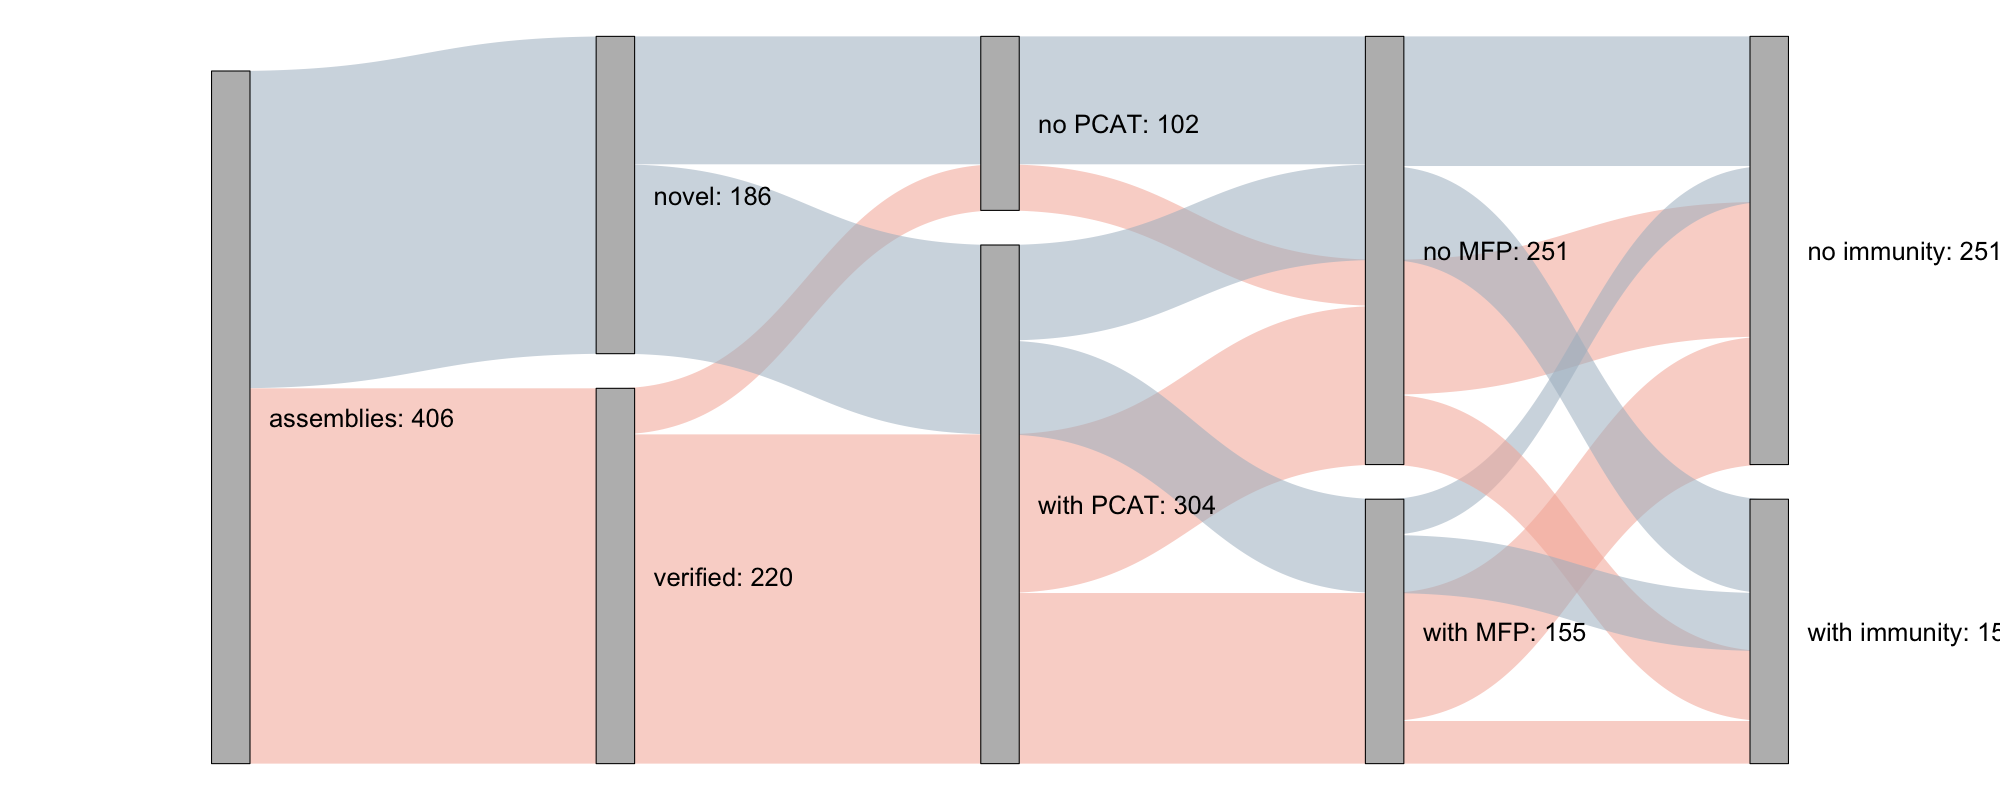

In [35]:
%%R -w 2000 -h 800
microcin_hits_all_melt %>%
	group_by(y) %>%
	summarise(sum_value = sum(value)) %>%
	unite("category", c(y,sum_value), sep = ": ",remove = FALSE) %>%
	full_join(microcin_hits_all_melt) %>%
	ggplot(aes(x, id = id, split = category, value = value)) +
		geom_parallel_sets(aes(fill = b_verified, axis.width = 0.1,
			alpha=0.25
			)) +
		geom_parallel_sets_axes(axis.width = 0.1, color = "black", fill = "#BBBBBB") +
		geom_parallel_sets_labels(colour = "black" , angle = 0, 
			position = position_nudge(x = 0.1), 
			size = 9, 
			# face = "italic",
			hjust = 0
			) +
		scale_fill_manual(values=c("#AABBCA","#F4B3A5")) +
		# theme(text = element_text(size = 200))
		theme_nothing() #+
		# theme(text = element_text(size = 50))   


# ggsave("microcin_hits_all_sankey.svg")

In [36]:
%%R -w 2000 -h 800
microcin_hits_all_melt %>%
	group_by(y) %>%
	summarise(sum_value = sum(value)) %>%
	unite("category", c(y,sum_value), sep = ": ",remove = FALSE) %>%
	full_join(microcin_hits_all_melt) %>%
	ggplot(aes(x, id = id, split = category, value = value)) +
		geom_parallel_sets(aes(fill = b_verified, axis.width = 0.1,
			alpha=0.25
			)) +
		geom_parallel_sets_axes(axis.width = 0.1, color = "black", fill = "#BBBBBB") +
		geom_parallel_sets_labels(colour = "black" , angle = 0, 
			position = position_nudge(x = 0.1), 
			size = 9, 
			# face = "italic",
			hjust = 0
			) +
		scale_fill_manual(values=c("#AABBCA","#F4B3A5")) +
		# theme(text = element_text(size = 200))
		theme_nothing() #+
		# theme(text = element_text(size = 50))   


ggsave("plots/02_microcin_hits_all_sankey.svg")

Joining, by = "y"


R[write to console]: Saving 27.8 x 11.1 in image

